# Analyze trained models

Here we want to take a closer look at some of the trained models, in particular those with slightly surprising hyperparameters.


In [1]:
import pathlib
import pickle as pkl
import sys
sys.path.append(str(pathlib.Path("__file__").absolute().parents[1]))

import numpy as np
import pandas as pd
import wandb

from src.util.definitions import PRED_DIR, DATA_ROOT, LOG_DIR
from utils import get_runs_as_list

## JG1130
For this XGB model, the hparam search converged to extremely strong regularization (gamma=10)

In [68]:
summary_list, config_list, tag_list, name_list = get_runs_as_list(filters={"$and": [{"config.experiment_id": "JG1153"}, {"jobType": "hparam_best"}]})

In [69]:
name_list

['2023-11-03-004901_664541_fold8',
 '2023-11-03-004901_664541_fold7',
 '2023-11-03-004901_664541_fold6',
 '2023-11-03-004901_664541_fold5',
 '2023-11-03-004901_664541_fold4',
 '2023-11-03-004901_664541_fold3',
 '2023-11-03-004901_664541_fold2',
 '2023-11-03-004901_664541_fold1',
 '2023-11-03-004901_664541_fold0']

In [70]:
# we look at the model for the first fold
model_path = LOG_DIR / "checkpoints" / run / "model.pkl"
model_path.is_file()

True

In [71]:
with open(model_path, "rb") as f:
    model = pkl.load(f)

In [72]:
from xgboost import plot_tree
import matplotlib.pyplot as plt

In [73]:
model

MultiOutputClassifier(estimator=XGBClassifier(base_score=None, booster=None,
                                              callbacks=None,
                                              colsample_bylevel=None,
                                              colsample_bynode=None,
                                              colsample_bytree=0.5,
                                              early_stopping_rounds=None,
                                              enable_categorical=False,
                                              eval_metric='logloss',
                                              feature_types=None, gamma=10.0,
                                              gpu_id=None, grow_policy=None,
                                              importance_type=None,
                                              interaction_constraints=None,
                                              learning_rate=0.03700991930417961,
                                              max_bin=None,
                                              max_cat_threshold=None,
                                              max_cat_to_onehot=None,
                                              max_delta_step=None, max_depth=6,
                                              max_leaves=None,
                                              min_child_weight=None,
                                              missing=nan,
                                              monotone_constraints=None,
                                              n_estimators=100, n_jobs=None,
                                              num_parallel_tree=None,
                                              predictor=None, random_state=None, ...))

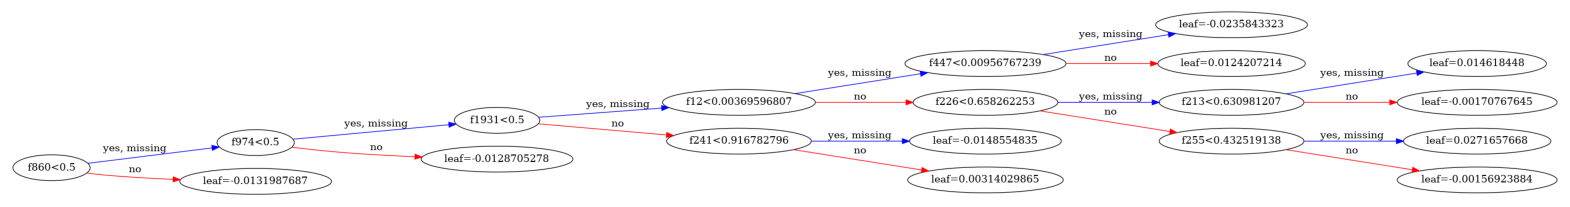

In [79]:
fig, ax = plt.subplots(figsize=(20,30))
plot_tree(model.estimators_[0], ax=ax, rankdir="LR", num_trees=99)
plt.show()
#plt.savefig("tree.png", dpi=600)


In [21]:
model.estimators_[0].n_estimators

100

In [54]:
run = name_list[-1]